# Deep Learning Fundamentals - Part 1

Youtube Link: https://www.youtube.com/watch?v=MDABnmb17lQ&ab_channel=FullStackDeepLearning 

Course Page: https://fullstackdeeplearning.com/spring2021/ 

## Colab environment

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.7.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.3.1         
torchvision                   0.8.2+cu101   


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Wed Mar  3 02:26:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X


array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.64267151, 0.01468584],
       [0.01677916, 0.87264365],
       [0.69879092, 0.42555516]])

In [ ]:
X > 0.5

array([[ True, False],
       [False,  True],
       [ True, False]])

In [ ]:
X[X > 0.5] = 1
X[X < 0.5] = 0
X

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

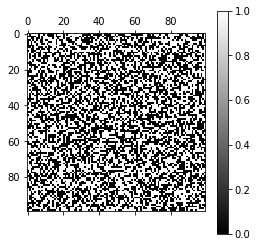

In [ ]:
X = np.random.rand(100, 100)
X[X > 0.5] = 1
X[X < 0.5] = 0
plt.matshow(X)
plt.colorbar()

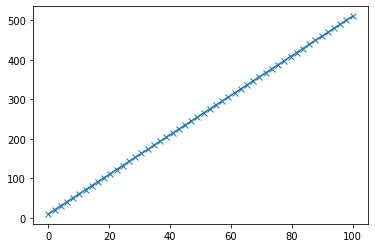

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


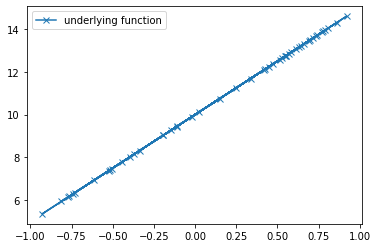

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# format y = wx+b
# so y = 5x + 10 would be:
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
weights_true
bias_true 
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

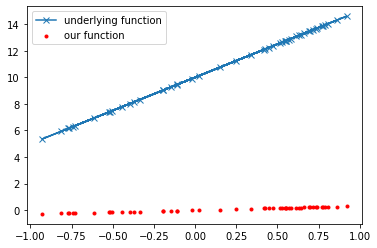

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()
# basically you cant just predict a without any regression... need a loss function (derivitive)
# prediction is always low here because it is initialized from a gausian distribution so between 0 and 1

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 122.90030726410203


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.
# Gradient means derivitive here
# this contains the entirity of the code for the error and linear layer

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

 # y = wx + b
 # dy/dx = w = dx
 # dy/dw = x = dw
 # dy/db = 1 = db
 # but remember the input to this linear function is given from the loss function so assume instead of 1 its
 # the output of the loss function and w is w(output)
   
#To calculate the values for weight and bias 'gradients':
  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

#To update the values of weight and bias given the learning rate. Subtract to go down the curve and it'll find the local min.
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
# Define loss as MSE
loss = MSE()
# compute the y values of the linear function (ground truth)
linear = Linear(d)
# compute the prediction of y values the linear function
y_pred = linear(x)
# compute the loss between the predicted and true values and print it
print(loss(y_pred, y_true))
# compute the gradient (or derivitive) of the loss
loss_gradient = loss.backward()
# compute a backward step in the linear layer which defines initial values for the gradient of w, b, input
linear.backward(loss_gradient)
# update the values for w and b given the initial values, derivitive of loss with those values, and a learning rate
linear.update(0.1)
# make new predictions with this updated linear function
y_pred = linear(x)
# print updated loss after one step of gradient descent (this prints the loss for the 1st and 2nd rounds respectively)
print(loss(y_pred, y_true))

114.77044192248572
72.11845595969477


3### Train using gradient descent!

Epoch 0, loss 126.397367489147
Epoch 5, loss 13.35752443531678
Epoch 10, loss 1.8582791809100891
Epoch 15, loss 0.4795724300252233
Epoch 20, loss 0.20686485094541993
Epoch 25, loss 0.10607202163473549
Epoch 30, loss 0.056431276644734414
Epoch 35, loss 0.030230202327464283


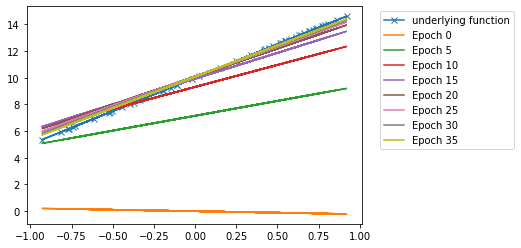

In [ ]:
# Train by doing exactly what we did above but now with a 'for' loop that runs for 40 epochs
# every 5 epochs print the loss and plot the function
# this is the entire code for the training loop
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


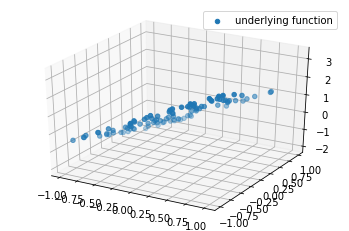

In [ ]:
# What about 2-dimensional x?

# generate an array of random numbers with 100 rows and 2 columns
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# everything is the same as before except now there are two seperate weights (one for each dimension)
# y = w * x + b for 1 dimension becomes
# y = w_0 * x_0 + w_1 * x_1 + b
# can still just use the same matrix multiply format
# y = w@x + b
# so basically we have some 2 dimensional linear function and we are trying to optimise coefficients of a general
# 2 dimensional linear function to match it

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

2.3461558456015736


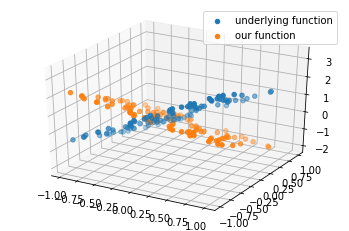

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 0.20194167278697922
Epoch 1, loss 0.1793082509705521
Epoch 2, loss 0.15924569629037064
Epoch 3, loss 0.1414568829187756
Epoch 4, loss 0.12567978981603056
Epoch 5, loss 0.11168323687217155
Epoch 6, loss 0.09926315759771415
Epoch 7, loss 0.08823933746604438
Epoch 8, loss 0.07845255711958486
Epoch 9, loss 0.06976208812327839
Epoch 10, loss 0.06204349610524844
Epoch 11, loss 0.05518671220845221
Epoch 12, loss 0.04909433897546627
Epoch 13, loss 0.043680161247784816
Epoch 14, loss 0.03886783649829677
Epoch 15, loss 0.03458974232603054
Epoch 16, loss 0.030785961704012755
Epoch 17, loss 0.02740338904919816
Epoch 18, loss 0.024394942332405082
Epoch 19, loss 0.02171886831205502
Epoch 20, loss 0.01933812959734017
Epoch 21, loss 0.017219863657527854
Epoch 22, loss 0.015334905122951213
Epoch 23, loss 0.013657363794263175
Epoch 24, loss 0.01216425171075393
Epoch 25, loss 0.01083515344403987
Epoch 26, loss 0.009651934495826003
Epoch 27, loss 0.008598483301199382
Epoch 28, loss 0.0076604

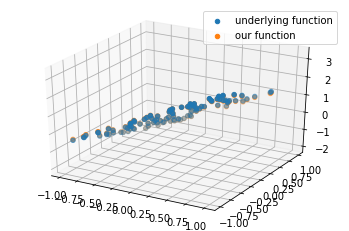

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=50)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


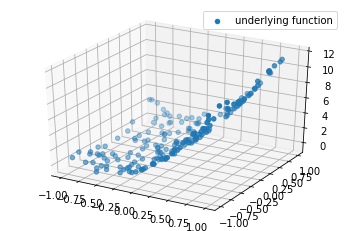

In [ ]:
# Make non-linear data
# the issue is that you can't just use a basic matrix multiply function to generate a general function for nonlinear data
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 16.14316118312711
Epoch 1, loss 12.453948126917146
Epoch 2, loss 9.931190002328655
Epoch 3, loss 8.174640423992663
Epoch 4, loss 6.925739018845454
Epoch 5, loss 6.016898788970818
Epoch 6, loss 5.339013871637608
Epoch 7, loss 4.820632795524288
Epoch 8, loss 4.414601554795569
Epoch 9, loss 4.089490789157867
Epoch 10, loss 3.824087793812928
Epoch 11, loss 3.603852653063603
Epoch 12, loss 3.418633721108016
Epoch 13, loss 3.261191108407366
Epoch 14, loss 3.1262390653458967
Epoch 15, loss 3.00982201502534
Epoch 16, loss 2.9089054845477977
Epoch 17, loss 2.821105766262623
Epoch 18, loss 2.744509413802157
Epoch 19, loss 2.6775511508969263
Epoch 20, loss 2.6189299697535198
Epoch 21, loss 2.5675503769936707
Epoch 22, loss 2.5224803533846174
Epoch 23, loss 2.4829205535931735
Epoch 24, loss 2.448181176000587
Epoch 25, loss 2.4176641592876775
Epoch 26, loss 2.3908491547866992
Epoch 27, loss 2.367282236982774
Epoch 28, loss 2.34656664865503
Epoch 29, loss 2.3283550958308235
Epoch 30, l

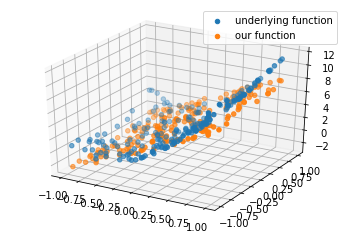

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.
# This is the entire code fo the ReLU
# first chunk is forward step, then backward step. 
# This will cut off negative numbers and make them 0 instead (standard relu thing) leaving alone positive numbers

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

14.540775465129514


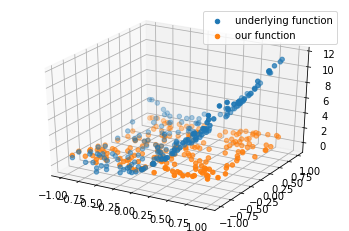

In [ ]:
# We are going to define the model:
#   It will consist of 3 layers, a linear, a non-linear (relu), and a second linear
#   the first linear layer takes us from the input dimension (2 here) and brings us to the number of hidden units
#   Then in the 2nd layer we apply the non-linearity with the number of hidden units
#   Then the final linear layer will take us from the number of hidden units to 1
#   1 because we are doing regression and want 1 real value output for the loss
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

#   This will use the model, we apply the first linear layer and get l1 and feed this to the relu layer and get r
#   and finally feed this to the linear2 and get l2  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

#   For the backward step we go... backwards. Taking the gradient from L2 and applying this to the relu to get relu_gradient
#   and feed this to the linear 1 layer to get l1_gradient  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

#   Update each linear layer with its now stored, updated value.
#   We don't need to update ReLU as it doesn't have any weights in its function
  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

#   Let's instantiate: First define the loss function
loss = MSE()
#   Give the model some parameters, input d (dimensions; 2 from earlier), and 10 hidden layers
model = Model(d, 10)
#   output a prediction (solve function with initial inputs)
y_pred = model(x)
#   Compute loss with those inputs
loss_value = loss(y_pred, y_true)
#   Compute the loss gradient (derivitive of the loss function) and print the loss value
loss_gradient = loss.backward()
print(loss_value)
#   Take a backward prop step with the gradient
model.backward(loss_gradient)
#   Plot results, no training applied so this is our initial loss
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step to make sure loss is decreasing
# Always do this to make sure math is correct
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

18.52809831039167
10.230332516417315


Epoch 0, loss 10.230332516417315
Epoch 1, loss 6.879464089678431
Epoch 2, loss 4.698506780408564
Epoch 3, loss 3.279032450684481
Epoch 4, loss 2.4179519193851955
Epoch 5, loss 1.871557826163835
Epoch 6, loss 1.5186905206143968
Epoch 7, loss 1.2787386243022478
Epoch 8, loss 1.1047990666554415
Epoch 9, loss 0.9699714884763148
Epoch 10, loss 0.8621053819106024
Epoch 11, loss 0.7732713695286964
Epoch 12, loss 0.6982630038328632
Epoch 13, loss 0.6344722555915715
Epoch 14, loss 0.5795708172053063
Epoch 15, loss 0.5311481955399681
Epoch 16, loss 0.4889597357727789
Epoch 17, loss 0.45192530747969767
Epoch 18, loss 0.4198402571149866
Epoch 19, loss 0.3915305290294138
Epoch 20, loss 0.3663404133981629
Epoch 21, loss 0.34399609911304685
Epoch 22, loss 0.3241956079346855
Epoch 23, loss 0.3065576598309098
Epoch 24, loss 0.29093937133835346
Epoch 25, loss 0.2770044739398498
Epoch 26, loss 0.26451406678923867
Epoch 27, loss 0.25327529560688583
Epoch 28, loss 0.24323658330056283
Epoch 29, loss 0.23426

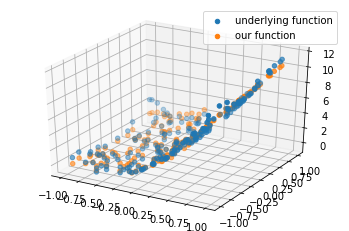

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [ ]:
# Rather than coding the entire thing from scratch, let's just do it in PyTorch
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

# only difference from our code is instead of numpy arrays, torch needs tensors
# x is a numpy array so we just define it as a tensor in line 3 below
# this initializes with some values and computes the loss (initial loss)
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.6492, grad_fn=<MseLossBackward>)


In [ ]:
# Test just one forward and backward step, make sure loss decreases
# in torch you can do this with the optimizer, this one is stochastic gradient descent but torch has many
# the optimizer.step() does the backpropogation and updating values
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(14.0471, grad_fn=<MseLossBackward>)
tensor(10.5312, grad_fn=<MseLossBackward>)


tensor(10.5312, grad_fn=<MseLossBackward>)
tensor(7.9093, grad_fn=<MseLossBackward>)
tensor(6.0652, grad_fn=<MseLossBackward>)
tensor(4.6266, grad_fn=<MseLossBackward>)
tensor(3.4770, grad_fn=<MseLossBackward>)
tensor(2.6295, grad_fn=<MseLossBackward>)
tensor(2.0149, grad_fn=<MseLossBackward>)
tensor(1.5541, grad_fn=<MseLossBackward>)
tensor(1.2102, grad_fn=<MseLossBackward>)
tensor(0.9684, grad_fn=<MseLossBackward>)
tensor(0.7959, grad_fn=<MseLossBackward>)
tensor(0.6686, grad_fn=<MseLossBackward>)
tensor(0.5745, grad_fn=<MseLossBackward>)
tensor(0.5036, grad_fn=<MseLossBackward>)
tensor(0.4501, grad_fn=<MseLossBackward>)
tensor(0.4087, grad_fn=<MseLossBackward>)
tensor(0.3760, grad_fn=<MseLossBackward>)
tensor(0.3503, grad_fn=<MseLossBackward>)
tensor(0.3300, grad_fn=<MseLossBackward>)
tensor(0.3136, grad_fn=<MseLossBackward>)
tensor(0.2999, grad_fn=<MseLossBackward>)
tensor(0.2885, grad_fn=<MseLossBackward>)
tensor(0.2790, grad_fn=<MseLossBackward>)
tensor(0.2709, grad_fn=<MseLossBa

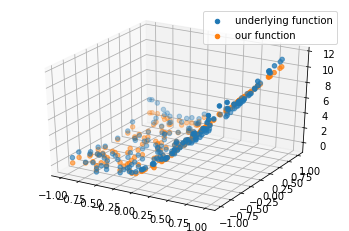

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
7/7 [==============================] - 0s 2ms/step - loss: 10.3447
Epoch 2/30
7/7 [==============================] - 0s 1ms/step - loss: 0.8210
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 0.4490
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3325
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3051
Ep

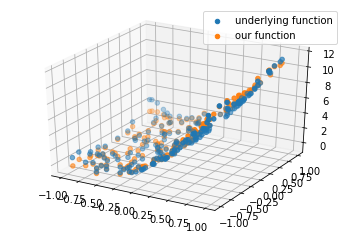

In [ ]:
# same exact thing this time with Keras formatting (interface for Tensorflow)
# Dense is a linear layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

#Define model
inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

#initialize model and define loss and given an optimizer with a learning rate
model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

# Here we don't need to write our own fit/train function as Keras does this for us
model.fit(x, y_true, epochs=30)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))